## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Colab Content Table:**


->  Importing the required libraries

->  Fetch the dataset from the given format

->   Understanding Dataset by doing some Data Exploration Operations

->   Data Cleaning and Store it in proper format (remove/replace null values,   drop dulicate rows, change in required datatypes)

->   Some important observations on data.

->   Exploratory Data Analysis

->   Findout some Co-relations in dataset 



In [ ]:
#Importing Libraries like: Numpy, Pandas, Datetime, Matplotlib
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing/Fetching datasets from CSV format
playstore_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Capstone Projects /Capstone Project - Exploratory Data Analysis (EDA)/Play Store Data.csv')
user_review_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Capstone Projects /Capstone Project - Exploratory Data Analysis (EDA)/User Reviews.csv')

In [ ]:
#Understanding Dataset by doing some Data Exploration Operations
playstore_data.shape,user_review_data.shape

((10841, 13), (64295, 5))

In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
Rating_Mode = playstore_data['Rating'].mode().values[0]
Type_Mode = playstore_data['Type'].mode().values[0]
Content_Rating_Mode = playstore_data['Content Rating'].mode().values[0]
Android_Ver_Mode = playstore_data['Android Ver'].mode().values[0]

playstore_data[playstore_data['Rating'].isna()] = Rating_Mode
playstore_data[playstore_data['Type'].isna()] = Type_Mode
playstore_data[playstore_data['Content Rating'].isna()] = Content_Rating_Mode
playstore_data[playstore_data['Android Ver'].isna()] = Android_Ver_Mode

playstore_data['Current Ver'].fillna('Not Available',inplace=True)

In [ ]:
playstore_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Here we have to change the respective Datatypes for the columns like: 

*   Rating (to Float)
*   Review (to int)
*   Size in Kilobytes (to int)
*   Installs (in int)
*   Price (in Integers)
*   Last Updated (in Datetime)

In [ ]:
playstore_data.drop([4453],axis=0,inplace=True)

In [ ]:
Data_to_drop = playstore_data[playstore_data['App'] == playstore_data['Rating']]
playstore_data.drop(Data_to_drop.index[:],axis=0,inplace=True)

In [ ]:
#Changing the columns in their respective datatypes with proper format and Remove 4453 the default row
try:
  playstore_data.rename({'Price':'Price (in $)'},inplace=True,axis=1)

  playstore_data['Reviews']=playstore_data['Reviews'].replace('4.1 and up',0).replace('Everyone',0).astype(int)

  playstore_data['Rating'] = playstore_data['Rating'].replace('4.1 and up',playstore_data['Rating'].mean()).replace('Everyone',playstore_data['Rating'].mean()).astype(float)

  playstore_data['Installs']=playstore_data['Installs'].apply(lambda x : int(x[0:(len(x)-1)].replace(',','')))

  playstore_data['Price (in $)'] = playstore_data['Price (in $)'].replace('4.1 and up',0).replace('Everyone',0).apply(lambda x: float(x.replace('$','')))

  playstore_data['Last Update Year'] = pd.DatetimeIndex(pd.to_datetime(playstore_data['Last Updated'].apply(lambda x : x[-4:]),format='%Y')).year
  
except:
  print('Float Value Problem')

In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9364 non-null   object 
 1   Category          9364 non-null   object 
 2   Rating            9364 non-null   float64
 3   Reviews           9364 non-null   int64  
 4   Size              9364 non-null   object 
 5   Installs          9364 non-null   int64  
 6   Type              9364 non-null   object 
 7   Price (in $)      9364 non-null   float64
 8   Content Rating    9364 non-null   object 
 9   Genres            9364 non-null   object 
 10  Last Updated      9364 non-null   object 
 11  Current Ver       9364 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Last Update Year  9364 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


In [ ]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review_data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
user_review_data.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [ ]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
user_review_data.shape

(37427, 5)

# Problem statements on which data need to be analysed, Those are:-
Q1: List all different Categories and find the best application in Each Category in terms of installs  and also plot he bar graph for max installs in each category?

Q2: Pie Chart for number of applications(Category-wise) available on Playstore.

Q3: Correlation Heatmap among: Rating , Review, Install, Price.

Q4: Corr Graph Between Sentiment Polarity and Sentiment Subjectivity for All the 'Positive' Sentiment.

Q5: Find how many products are listed by 'Google and List all them also find their average Rating.

Q6: Which genre of Games has most number of Applications?

Q7: In Which year most of the applications got updated and show it through a LinePlot?

Q8: Which category has maximum number of 'Postive' and 'Negative' Sentiments?

Q9: Top 5 free Gaming and ART_AND_DESIGN Applications , Those are having high ratings.

Q10: find maximum Installs applications and provide it's 5 best Review.

Q11: Number of Paid and Free Application with Graph.

Q12: Free Application that have least rating and also provide its category.

Q13: Find the best rating application and it's reviews size and downloads

Q14: Application having more than 5000000+ installs

Q15: All the 17+ content rating application

Q16: Analysis of top 5 Food and Drink category app

Q17: Total number of content rating provided by teens user(categorywise) and plot the bar graph

Q18: Find the Revenue of the app

Q19: Find the avarage number of words used in translated review

Q20: Different user sentiment analysis by bar graph used in translated review

Q21: Top 5 application having positive: Sentiment Polarity > 0.5, Sentiment subjectivity >0.5

Q22: Sum of Sentiment polarity rate categorywise and plot the pie chart

Q23: Top 5 Apps with highest installs and their genre?

Q24: Category which has max apps with rating 4+ ?

Q25: Top 5 Most expensive application & their genre and installs?

Q26: How many applications were famous among teens and their list?

Q27: Top 5 applications with the highest Revenue from downloads?

Q28: Correlation b/w installs and ratings. 

Q29: Relation between Total number of installations per category.

# Q1: List all different Categories and find the best application in Each Category in terms of installs  and also plot he bar graph for max installs in each category?

In [ ]:
playstore_data.shape

(9364, 14)

In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9364 non-null   object 
 1   Category          9364 non-null   object 
 2   Rating            9364 non-null   float64
 3   Reviews           9364 non-null   int64  
 4   Size              9364 non-null   object 
 5   Installs          9364 non-null   int64  
 6   Type              9364 non-null   object 
 7   Price (in $)      9364 non-null   float64
 8   Content Rating    9364 non-null   object 
 9   Genres            9364 non-null   object 
 10  Last Updated      9364 non-null   object 
 11  Current Ver       9364 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Last Update Year  9364 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


In [ ]:
Every_Catergory_Best_App_Installation_Basis = playstore_data.groupby(['Category'],as_index=False)['Installs'].idxmax()
max_install_catagory_index = pd.Series(Every_Catergory_Best_App_Installation_Basis['Installs'])
playstore_data.loc[max_install_catagory_index,['Category','App','Installs']]

,Category,App,Installs
3,ART_AND_DESIGN,Sketch - Draw & Paint,50000000
72,AUTO_AND_VEHICLES,"Android Auto - Maps, Media, Messaging & Voice",10000000
117,BEAUTY,Beauty Camera - Selfie Camera,10000000
152,BOOKS_AND_REFERENCE,Google Play Books,1000000000
194,BUSINESS,OfficeSuite : Free Office + PDF Editor,100000000
297,COMICS,LINE WEBTOON - Free Comics,10000000
335,COMMUNICATION,Messenger – Text and Video Chat for Free,1000000000
482,DATING,Zoosk Dating App: Meet Singles,10000000
699,EDUCATION,Duolingo: Learn Languages Free,100000000
865,ENTERTAINMENT,Google Play Games,1000000000


In [ ]:
Every_Category_Mean_Installs = playstore_data.groupby(['Category'],as_index=True).agg({'Installs':"mean"}).rename(columns ={'Installs':'Installs in Million'})
final_df_for_plot = Every_Category_Mean_Installs['Installs in Million'].apply(lambda x: x/1000000)
final_df_for_plot

Category
ART_AND_DESIGN          2.003760
AUTO_AND_VEHICLES       0.727805
BEAUTY                  0.640862
BOOKS_AND_REFERENCE    10.793773
BUSINESS                3.306165
COMICS                  0.966140
COMMUNICATION          99.534273
DATING                  1.355360
EDUCATION               5.621626
ENTERTAINMENT          19.256107
EVENTS                  0.354431
FAMILY                  5.871609
FINANCE                 2.713970
FOOD_AND_DRINK          2.511722
GAME                   31.983466
HEALTH_AND_FITNESS      5.330156
HOUSE_AND_HOME          2.218184
LIBRARIES_AND_DEMO      0.955123
LIFESTYLE               1.711978
MAPS_AND_NAVIGATION     5.840867
MEDICAL                 0.152016
NEWS_AND_MAGAZINES     32.172578
PARENTING               0.622322
PERSONALIZATION         7.453019
PHOTOGRAPHY            31.824111
PRODUCTIVITY           40.387664
SHOPPING               13.646351
SOCIAL                 54.323712
SPORTS                  5.489440
TOOLS                  15.600442
T

Text(0, 0.5, 'Approximate Installs in Million')

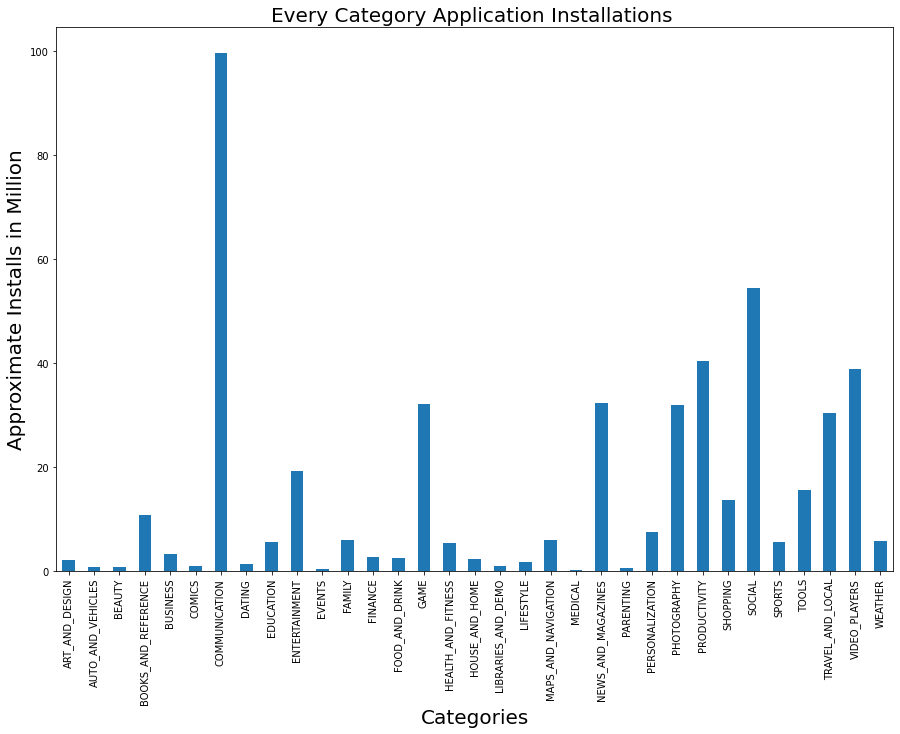

In [ ]:
Category_Install_Bar = final_df_for_plot.plot.bar(figsize = (15,10),fontsize = 10)

# Set the title
Category_Install_Bar.set_title("Every Category Application Installations ", fontsize = 20)

# Set x and y-labels
Category_Install_Bar.set_xlabel("Categories", fontsize = 20)
Category_Install_Bar.set_ylabel("Approximate Installs in Million", fontsize = 20)

# Q2: Pie Chart for number of applications(Category-wise) available on Playstore.

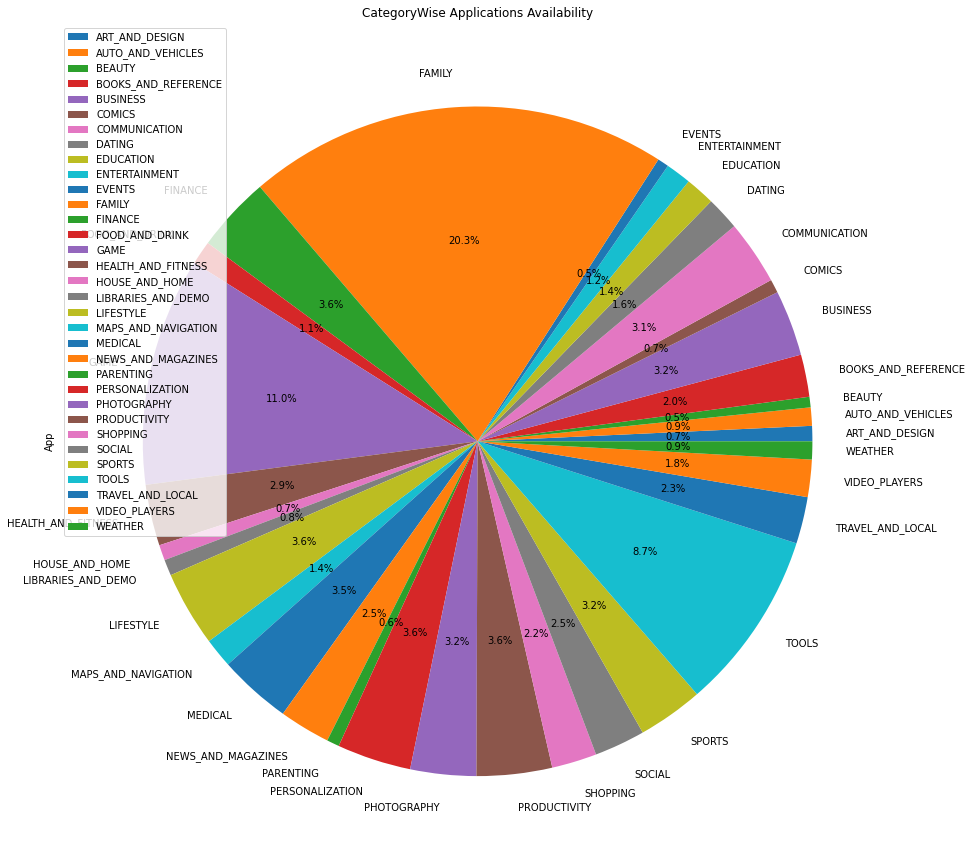

In [ ]:
#Finding values need to plot a pie-chart
Pie_Chart_Data = playstore_data.groupby(['Category'],as_index=False)['App'].nunique()
Pie_Chart_Data.set_index('Category', inplace=True)
Pie_Chart_Data_Values = Pie_Chart_Data['App'].tolist()
Pie_Chart_Data.plot.pie(y='App',title="CategoryWise Applications Availability",autopct='%1.1f%%',figsize =(15, 16))

# Q3: Correlation Heatmap among: Rating , Review, Install, Price.

In [ ]:
RRIP_corr = playstore_data[['Rating', 'Reviews', 'Installs', 'Price (in $)']]
corr_playstore_data = RRIP_corr.corr()
corr_playstore_data

,Rating,Reviews,Installs,Price (in $)
Rating,1.000000,0.068161,0.051377,-0.021901
Reviews,0.068161,1.000000,0.641610,-0.009820
Installs,0.051377,0.641610,1.000000,-0.011891
Price (in $),-0.021901,-0.009820,-0.011891,1.000000


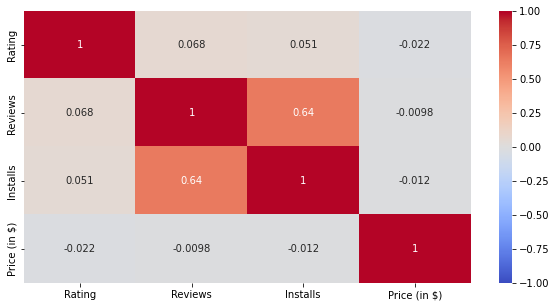

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_playstore_data, vmin=-1, cmap='coolwarm', annot=True)

# Q4: Corr Graph Between Sentiment Polarity and Sentiment Subjectivity for All the Positive Sentiments.

In [ ]:
Sentiment_Positive = user_review_data[user_review_data['Sentiment'] == 'Positive'][['Sentiment_Polarity','Sentiment_Subjectivity']]
Sentiment_Positive

,Sentiment_Polarity,Sentiment_Subjectivity
0,1.000000,0.533333
1,0.250000,0.288462
3,0.400000,0.875000
4,1.000000,0.300000
5,1.000000,0.300000
...,...,...
64217,0.233333,0.550000
64221,0.021591,0.259470
64222,0.173333,0.486667
64223,0.225000,0.447222


In [ ]:
corr_urd_df = Sentiment_Positive.corr()
corr_urd_df

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.461722
Sentiment_Subjectivity,0.461722,1.000000


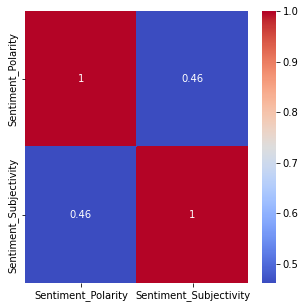

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_urd_df, cmap='coolwarm', annot=True)

# Q5: Find how many products are listed by 'Google and List all them also find their average Rating.

In [ ]:
Num_Of_App_By_Google = playstore_data[playstore_data['App'].str.contains('Google')]['App'].nunique()
Avg_Rating_Of_Google_Apps = playstore_data[playstore_data['App'].str.contains('Google')]['Rating'].mean()
print(f'The number of Apps Listed by Google is: {Num_Of_App_By_Google} and Average Rating for Google Apps are: {round(Avg_Rating_Of_Google_Apps,1)}')

The number of Apps Listed by Google is: 48 and Average Rating for Google Apps are: 4.3


In [ ]:
list(playstore_data[playstore_data['App'].str.contains('Google')]['App'].unique())

['Google Play Books',
 'Google My Business',
 'Google Primer',
 'Google Ads',
 'Google Analytics',
 'Google Chrome: Fast & Secure',
 'Google Voice',
 'Google Duo - High Quality Video Calls',
 'Google Allo',
 'PHONE for Google Voice & GTalk',
 'Google Classroom',
 'Google Play Games',
 'Google Pay',
 'Google Fit - Fitness Tracking',
 'Google+',
 'Google Photos',
 'QuickPic - Photo Gallery with Google Drive Support',
 'Google Trips - Travel Planner',
 'Google Earth',
 'Google Street View',
 'Google',
 'Google Translate',
 'Files Go by Google: Free up space on your phone',
 'Gboard - the Google Keyboard',
 'Google Korean Input',
 'Google app for Android TV',
 'Google Assistant Go',
 'Google Handwriting Input',
 'Google Drive',
 'Google PDF Viewer',
 'Google Assistant',
 'Google Keep',
 'Google Calendar',
 'Google Docs',
 'Google Sheets',
 'Google Slides',
 'Google Play Movies & TV',
 'Google News',
 'Google Now Launcher',
 'Google I/O 2018',
 'Google AdSense',
 'Local Services ads by Goog

# Q6: Which genre of Games has most number of Applications?

In [ ]:
genre_data = playstore_data[playstore_data['Category'] == 'GAME'].groupby('Genres',as_index=True)

In [ ]:
print("Most of Gaming Applications is being made in: ")
genre_data['Genres'].count().head(1)

Most of Gaming Applications is being made in: 


Genres
Action    358
Name: Genres, dtype: int64

# Q7: In Which year most of the applications got updated and show it through a LinePlot?

In [ ]:
updated_year_df = pd.DataFrame(playstore_data.groupby('Last Update Year')['App'].count())

In [ ]:
Most_Updated_Apps_Year =updated_year_df.sort_values(by='App',ascending=False)
print(f"Applications got updated in year {Most_Updated_Apps_Year.index[0]} are: {int(Most_Updated_Apps_Year.values[0])} ")

Applications got updated in year 2018 are: 6506 


Text(0.5, 0, 'No Of Updates')

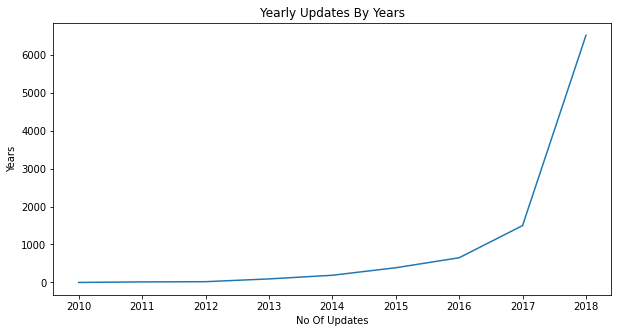

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(updated_year_df)
plt.title('Yearly Updates By Years')
plt.ylabel('Years')
plt.xlabel('No Of Updates')

# Q8: Which category has maximum number of 'Postive' and 'Negative' Sentiments?

In [ ]:
playstore_df = playstore_data[['App','Category']]
user_review_df = user_review_data[['App','Sentiment']]
merged_RJ_df = pd.merge(playstore_df, user_review_df, how='right',left_on=['App'],right_on='App') 
merged_RJ_df

,App,Category,Sentiment
0,10 Best Foods for You,HEALTH_AND_FITNESS,Positive
1,10 Best Foods for You,HEALTH_AND_FITNESS,Positive
2,10 Best Foods for You,HEALTH_AND_FITNESS,Positive
3,10 Best Foods for You,HEALTH_AND_FITNESS,Positive
4,10 Best Foods for You,HEALTH_AND_FITNESS,Positive
...,...,...,...
74059,Housing-Real Estate & Property,LIFESTYLE,Positive
74060,Housing-Real Estate & Property,LIFESTYLE,Positive
74061,Housing-Real Estate & Property,LIFESTYLE,Negative
74062,Housing-Real Estate & Property,LIFESTYLE,Positive


In [ ]:
postive_sentiment_max_category = merged_RJ_df[merged_RJ_df['Sentiment'] == 'Positive'].groupby('Category')['Sentiment'].count().rename_axis('Categories').reset_index(name='Counts').sort_values(by='Counts')
postive_sentiment_max_category

,Categories,Counts
5,COMICS,72
10,EVENTS,125
19,MAPS_AND_NAVIGATION,129
32,WEATHER,165
2,BEAUTY,185
22,PARENTING,185
31,VIDEO_PLAYERS,190
1,AUTO_AND_VEHICLES,236
17,LIBRARIES_AND_DEMO,238
0,ART_AND_DESIGN,259


Text(0, 0.5, 'Postive Sentiments')

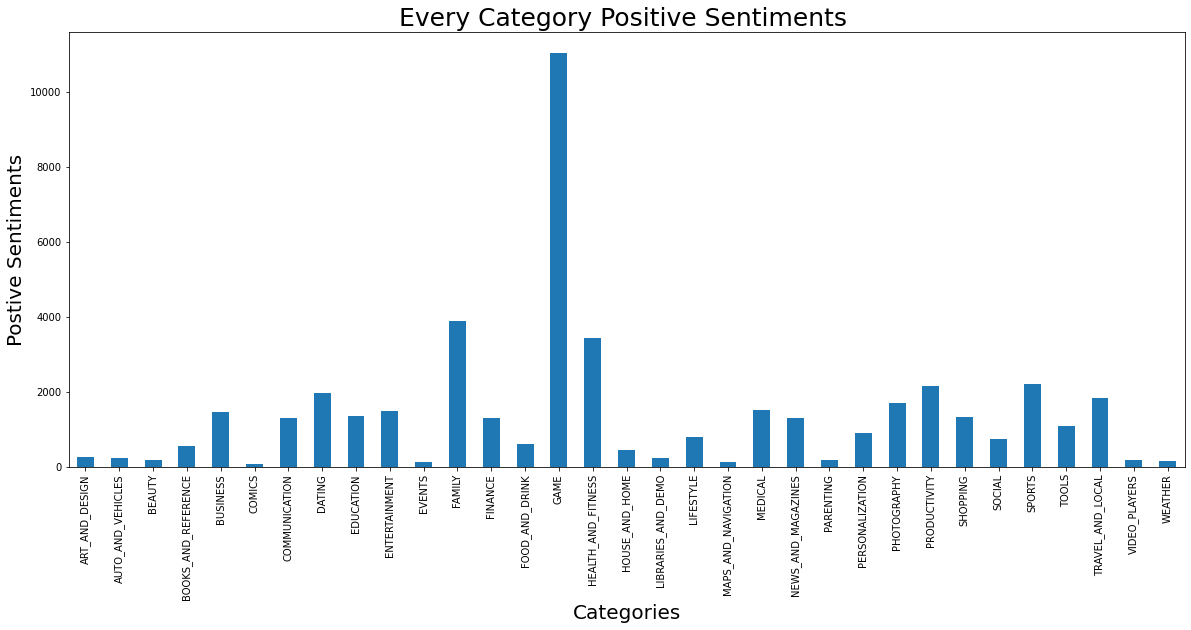

In [ ]:
#To draw a plot for above mention data we have to provide a fig size
Category_Positive_Sentiment_Bar = merged_RJ_df[merged_RJ_df['Sentiment'] == 'Positive'].groupby('Category')['Sentiment'].count().plot.bar(figsize = (20,8),fontsize = 10)

# Set the title
Category_Positive_Sentiment_Bar.set_title("Every Category Positive Sentiments ", fontsize = 25)

# Set x and y-labels
Category_Positive_Sentiment_Bar.set_xlabel("Categories", fontsize = 20)
Category_Positive_Sentiment_Bar.set_ylabel("Postive Sentiments", fontsize = 20)

In [ ]:
negative_sentiment_max_category = merged_RJ_df[merged_RJ_df['Sentiment'] == 'Negative'].groupby('Category')['Sentiment'].count().rename_axis('Categories').reset_index(name='Counts').sort_values(by='Counts')
negative_sentiment_max_category

,Categories,Counts
5,COMICS,2
10,EVENTS,16
1,AUTO_AND_VEHICLES,17
22,PARENTING,23
19,MAPS_AND_NAVIGATION,27
32,WEATHER,33
17,LIBRARIES_AND_DEMO,51
0,ART_AND_DESIGN,61
2,BEAUTY,65
31,VIDEO_PLAYERS,83


Text(0, 0.5, 'Negative Sentiments')

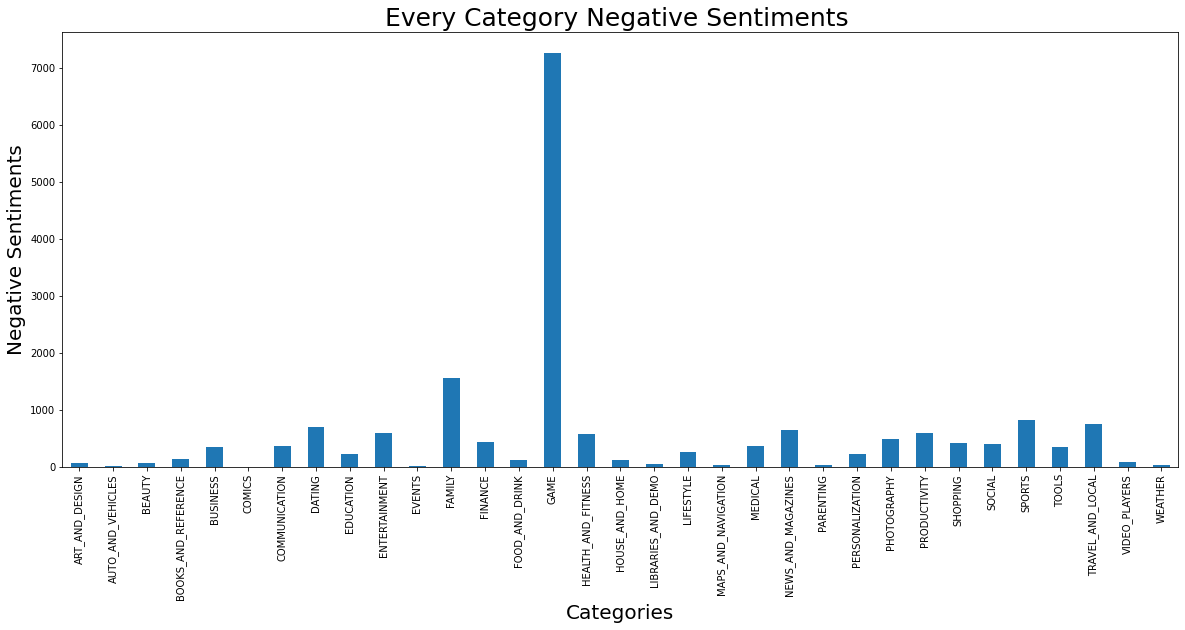

In [ ]:
#To draw a plot for above mention data we have to provide a fig size
Category_Negative_Sentiment_Bar = merged_RJ_df[merged_RJ_df['Sentiment'] == 'Negative'].groupby('Category')['Sentiment'].count().plot.bar(figsize = (20,8),fontsize = 10)

# Set the title
Category_Negative_Sentiment_Bar.set_title("Every Category Negative Sentiments ", fontsize = 25)

# Set x and y-labels
Category_Negative_Sentiment_Bar.set_xlabel("Categories", fontsize = 20)
Category_Negative_Sentiment_Bar.set_ylabel("Negative Sentiments", fontsize = 20)

In [ ]:
print(f'Maximum postive sentiment Category is: {postive_sentiment_max_category.Categories.iloc[-1]} and its count is:{postive_sentiment_max_category.Counts.iloc[-1]}  ')

Maximum postive sentiment Category is: GAME and its count is:11041  


In [ ]:
print(f'Maximum negative sentiment Category is: {negative_sentiment_max_category.Categories.iloc[-1]} and its count is:{negative_sentiment_max_category.Counts.iloc[-1]}  ')

Maximum negative sentiment Category is: GAME and its count is:7270  


# Q9: Top 5 free Gaming and ART_AND_DESIGN Applications , Those are having high ratings.

In [ ]:
a = playstore_data[playstore_data['Category']== 'GAME']
top_free_gaming = a[a['Type']== 'Free'].sort_values('Rating', ascending=False)
top_free_gaming.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
10776,Monster Ride Pro,GAME,5.0,1,24M,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,2018
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,2017
7698,CP Trivia,GAME,5.0,5,12M,100,Free,0.0,Everyone,Trivia,"August 6, 2018",0.99,5.0 and up,2018
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,2017
9265,EC Mover,GAME,5.0,5,4.6M,10,Free,0.0,Everyone,Racing,"August 1, 2018",1.11,4.0.3 and up,2018


In [ ]:
a = playstore_data[playstore_data['Category']== 'ART_AND_DESIGN']
top_free_gaming = a[a['Type']== 'Free'].sort_values('Rating', ascending=False)
top_free_gaming.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100,Free,0.0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,2018
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,10000,Free,0.0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up,2018
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,5000,Free,0.0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up,2018
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1.9M,5000,Free,0.0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up,2018
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,253,3.7M,50000,Free,0.0,Everyone,Art & Design,"November 1, 2017",1.0.0,4.0 and up,2017


# Q10: find maximum Installs applications and provide it's 5 best Review.

In [ ]:
max_installs = playstore_data.sort_values('Installs', ascending=False)
max_installs.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,2018
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018


In [ ]:
# Drop some column from Dataset and find best install app based on their category, review and rating.
playstore_data_max_col= max_installs.drop(['Size', 'Type', 'Price (in $)', 'Content Rating', 'Genres','Current Ver', 'Android Ver','Last Update Year','Last Updated'],axis=1).head().reset_index(drop=True)
playstore_data_max_col

,App,Category,Rating,Reviews,Installs
0,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000
1,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1000000000
2,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1000000000
3,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,1000000000
4,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,1000000000


# Q11: Number of Paid and Free Application with Graph.

In [ ]:
pf=playstore_data.groupby(["Type"])["Type"].count()
pf

Type
Free    8718
Paid     646
Name: Type, dtype: int64

Text(0.5, 0, 'Type')

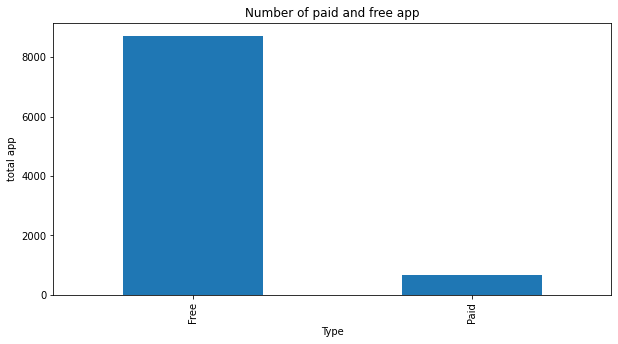

In [ ]:
pf.plot(kind = 'bar')
plt.title('Number of paid and free app')
plt.ylabel('total app')
plt.xlabel('Type')

# Q12: Free Application that have least rating and also provide its category.

In [ ]:
free_app = playstore_data.sort_values('Rating', ascending=True)
free_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500,Free,0.0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,2018
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100,Free,0.0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,2014
625,House party - live chat,DATING,1.0,1,9.2M,10,Free,0.0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,2018
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100,Free,0.0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up,2018
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500,Free,0.0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,2017


In [ ]:

free_app[['App','Category','Rating']].head(1)

,App,Category,Rating
8820,DS Creator 2.0,TOOLS,1.0


# Q13: Find the best Rating Application and its Review size and Downloads

In [ ]:
best_rating = playstore_data[playstore_data['Rating'] == 5.]
best_rating[['App','Reviews','Installs']]

,App,Reviews,Installs
329,Hojiboy Tojiboyev Life Hacks,15,1000
612,American Girls Mobile Numbers,5,1000
615,Awake Dating,2,100
633,Spine- The dating app,5,500
636,Girls Live Talk - Free Text and Video Chat,6,100
...,...,...,...
10721,Mad Dash Fo' Cash,14,100
10742,GKPB FP Online Church,32,1000
10776,Monster Ride Pro,1,10
10820,Fr. Daoud Lamei,22,1000


# Q14: Application having more than 5000000+ installs

In [ ]:
playstore_app = playstore_data[playstore_data['Installs'].astype(int) > 5000000 ]
playstore_app[['App']]

,App
3,Sketch - Draw & Paint
12,Tattoo Name On My Photo Editor
19,ibis Paint X
42,Textgram - write on photos
45,"Canva: Poster, banner, card maker & graphic de..."
...,...
10729,MX Player Codec (ARMv7)
10740,PhotoFunia
10781,Modern Strike Online
10784,Big Hunter


# Q15: All the 17+ content rating Application 

In [ ]:
playstore_data = playstore_data[playstore_data['Content Rating'] == 'Mature 17+']
playstore_data[['App']]

,App
133,Dresses Ideas & Fashions +3000
166,Read books online
170,Flybook
302,MangaToon - Comics updated Daily
303,Manga Net – Best Online Manga Reader
...,...
10717,Frontline Terrorist Battle Shoot: Free FPS Sho...
10765,Chat For Strangers - Video Chat
10783,Modern Counter Terror Attack – Shooting Game
10826,Frim: get new friends on local chat rooms


# Q16: Analysis of top 5 Food and Drink category app


In [ ]:
playapp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All Capstone Projects /Capstone Project - Exploratory Data Analysis (EDA)/Play Store Data.csv')
# drop the null value from Rating column
playapp_df.dropna(axis=0, how='all', subset=['Rating'], inplace=True)
playapp_df
# drop the row because of invalid data
playapp_df.drop([10472],axis=0,inplace=True)
#sort value from Rating column
sort_df=playapp_df.sort_values(["Rating"], ascending=False)
sort_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,$1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7M,100+,Free,0,Everyone,News & Magazines,"May 26, 2018",1.2,4.1 and up
8493,PK and DK Audio App,FAMILY,5.0,2,3.9M,100+,Free,0,Everyone,Entertainment,"October 25, 2017",5.1.4,4.1 and up
6330,HON. B.J. ACS COLLEGE ALE,FAMILY,5.0,3,1.8M,100+,Free,0,Mature 17+,Education,"December 26, 2016",3.1,4.3 and up
6342,BJ Foods,BUSINESS,5.0,3,1.5M,10+,Free,0,Everyone,Business,"February 7, 2018",2.7,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
7926,Tech CU Card Manager,FINANCE,1.0,2,7.2M,"1,000+",Free,0,Everyone,Finance,"July 25, 2017",1.0.1,4.0 and up


In [ ]:
# Find the Food and Drink category from Category column
food_app_df=sort_df[sort_df['Category'] == 'FOOD_AND_DRINK']
food_app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6646,Bar-B-Q Rib House,FOOD_AND_DRINK,5.0,2,33M,50+,Free,0,Everyone,Food & Drink,"March 8, 2018",0.8,2.3.3 and up
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24M,100+,Free,0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
6650,Bar-B-Q Recipes,FOOD_AND_DRINK,4.8,18,3.5M,"5,000+",Free,0,Everyone,Food & Drink,"August 15, 2016",1.0,4.0 and up
1212,SarashpazPapion (Cooking with Chef Bowls),FOOD_AND_DRINK,4.8,1250,13M,"50,000+",Free,0,Everyone,Food & Drink,"July 28, 2018",3.2.7,4.1 and up
1184,Pastry & Cooking (Without Net),FOOD_AND_DRINK,4.7,6118,Varies with device,"1,000,000+",Free,0,Everyone,Food & Drink,"July 7, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,Pyaterochka,FOOD_AND_DRINK,3.1,8412,Varies with device,"1,000,000+",Free,0,Everyone,Food & Drink,"July 19, 2018",Varies with device,4.4 and up
8737,Arby's,FOOD_AND_DRINK,3.1,194,26M,"100,000+",Free,0,Everyone,Food & Drink,"July 12, 2018",1.3.1,4.4 and up
3961,B.GOOD,FOOD_AND_DRINK,2.9,155,20M,"10,000+",Free,0,Everyone,Food & Drink,"April 4, 2018",4.94.19,4.1 and up
4522,Q-Tech Companion App,FOOD_AND_DRINK,1.8,17,3.1M,"10,000+",Free,0,Everyone,Food & Drink,"March 8, 2017",1.6.3,4.4 and up


In [ ]:
# Drop some column from Dataset and find best Food and Drink app based on Rating
df_new_column=food_app_df.drop(['Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated','Reviews','Size', 'Current Ver', 'Android Ver'],axis=1).head().reset_index(drop=True)
df_new_column

,App,Category,Rating
0,Bar-B-Q Rib House,FOOD_AND_DRINK,5.0
1,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0
2,Bar-B-Q Recipes,FOOD_AND_DRINK,4.8
3,SarashpazPapion (Cooking with Chef Bowls),FOOD_AND_DRINK,4.8
4,Pastry & Cooking (Without Net),FOOD_AND_DRINK,4.7


# Q17: Total number of content rating provided by teens user(categorywise) and plot the bar graph

In [ ]:
# find the all teen user from content rating
teen_df=playapp_df[playapp_df['Content Rating'] == 'Teen']
teen_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
34,I Creative Idea,ART_AND_DESIGN,4.7,353,4.2M,"10,000+",Free,0,Teen,Art & Design,"April 27, 2018",1.6,4.1 and up
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187,30M,"50,000+",Free,0,Teen,Beauty,"July 24, 2018",3.0.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442,17M,"100,000+",Free,0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up
10814,FR: My Secret Pets!,FAMILY,4.0,785,31M,"50,000+",Free,0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up


In [ ]:
# find the total no. of content rating provided by teen (categorywise) 
count_category = teen_df.groupby(["Category"])['Content Rating'].count()
count_category

Category
ART_AND_DESIGN           3
AUTO_AND_VEHICLES        1
BEAUTY                   2
BOOKS_AND_REFERENCE     20
BUSINESS                 4
COMICS                  22
COMMUNICATION           24
DATING                   6
EDUCATION                1
ENTERTAINMENT           96
EVENTS                   7
FAMILY                 242
FINANCE                  4
FOOD_AND_DRINK           7
GAME                   324
HEALTH_AND_FITNESS      17
HOUSE_AND_HOME           2
LIFESTYLE               18
MAPS_AND_NAVIGATION      2
MEDICAL                  3
NEWS_AND_MAGAZINES      31
PARENTING                1
PERSONALIZATION         28
PHOTOGRAPHY             12
PRODUCTIVITY             2
SHOPPING                48
SOCIAL                 106
SPORTS                  15
TOOLS                    5
TRAVEL_AND_LOCAL         5
VIDEO_PLAYERS           24
WEATHER                  2
Name: Content Rating, dtype: int64

Text(0.5, 0, 'Category')

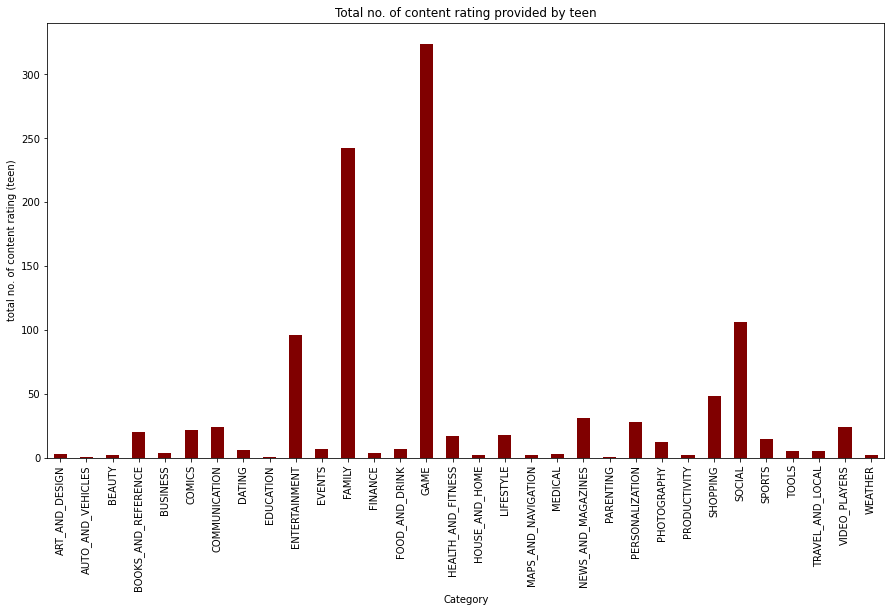

In [ ]:
#plot the bar graph
count_category.plot(kind='bar',color='maroon',figsize=(15,8))
plt.title('Total no. of content rating provided by teen')
plt.ylabel('total no. of content rating (teen)')
plt.xlabel('Category')

# Q18: Find the Revenue of the app

In [ ]:
# Change the string value into float in price column
a= playapp_df[playapp_df['App'] == playapp_df['Price']]
playapp_df.drop(a.index[:],axis=0,inplace=True)
playapp_df['Price']=playapp_df['Price'].replace('4.1 and up',0).replace('Everyone',0).apply(lambda x:float(x.replace('$','')))

In [ ]:
#playapp_df.info()
# find all price which is greater thean 0
daf_1=playapp_df['Price'].values >0
daf_2=playapp_df.loc[daf_1]
daf_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100+,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [ ]:
# Change the stinrg value into float in installs column
b= playapp_df[playapp_df['App'] == playapp_df['Installs']]
playapp_df.drop(b.index[:],axis=0,inplace=True)

playapp_df['Installs']=playapp_df['Installs'].apply(lambda x:float(x[0:(len(x)-1)].replace(',','')))
playapp_df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9366, dtype: float64

In [ ]:
# Create new Revenue column using price and installs column
playapp_df['Revenue']=playapp_df['Price']*playapp_df['Installs']
# sorting the value
sort_df_1=playapp_df.sort_values(["Revenue"], ascending=False)
sort_df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,Calculator ++,TOOLS,4.6,33509,3.6M,1000000.0,Free,0.00,Everyone,Tools,"May 12, 2018",2.2.7,4.4 and up,0.0
3305,Unit Converter,TOOLS,4.5,85387,5.4M,1000000.0,Free,0.00,Everyone,Tools,"July 3, 2018",2.1.54,4.0 and up,0.0
3304,Graphing Calculator,TOOLS,3.9,12388,5.3M,1000000.0,Free,0.00,Everyone,Tools,"April 1, 2016",1.17,2.3 and up,0.0
3303,Calculator with Percent (Free),TOOLS,4.8,48211,7.4M,1000000.0,Free,0.00,Everyone,Tools,"November 18, 2017",32.1,4.1 and up,0.0


# Q19: Find the avarage number of words used in translated review

In [ ]:
# Remove null value from Translated_Review column
user_review_data.dropna(axis=0, how='all', subset=['Translated_Review'], inplace=True)
user_review_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
# Fetching the Translated_Review column from the dataset
new_df=user_review_data.iloc[:,1:2]
#user_review_data.drop(new_df.index[:],axis=0,inplace=True)
new_df

,Translated_Review
0,I like eat delicious food. That's I'm cooking ...
1,This help eating healthy exercise regular basis
3,Works great especially going grocery store
4,Best idea us
5,Best way
...,...
64222,Most ads older many agents ..not much owner po...
64223,"If photos posted portal load, fit purpose. I'm..."
64226,"Dumb app, I wanted post property rent give opt..."
64227,I property business got link SMS happy perform...


In [ ]:
# Find the avarage number of words used in Translated_Review column
count=0
for item in new_df['Translated_Review']:
  count=count+len(item.split())
print("Total number of words in Translated_Review=",count)
print("Avarage number of words used in Translated_Review=",round(count/37427),'words.')

Total number of words in Translated_Review= 686808
Avarage number of words used in Translated_Review= 18 words.




# Q20: Different user sentiment analysis by bar graph


In [ ]:
# Remove null value from Sentiment column
user_review_data.dropna(axis=0, how='all', subset=['Sentiment'], inplace=True)
user_review_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
# Find the total number different user sentiment from Sentiment column
count_sentiment = user_review_data.groupby(["Sentiment"])["Sentiment"].count()
count_sentiment

Sentiment
Negative     8271
Neutral      5158
Positive    23998
Name: Sentiment, dtype: int64

Text(0.5, 0, 'Sentiment')

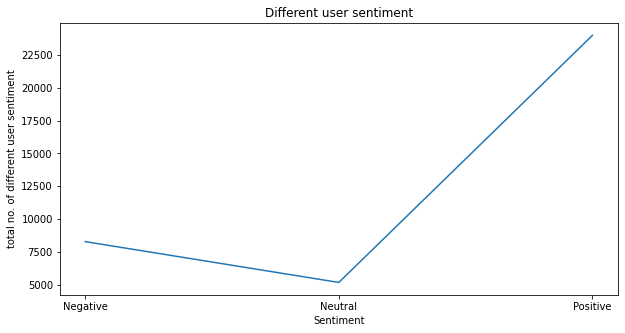

In [ ]:
plt.plot(count_sentiment)
plt.title('Different user sentiment')
plt.ylabel('total no. of different user sentiment')
plt.xlabel('Sentiment')

Text(0.5, 0, 'Sentiment')

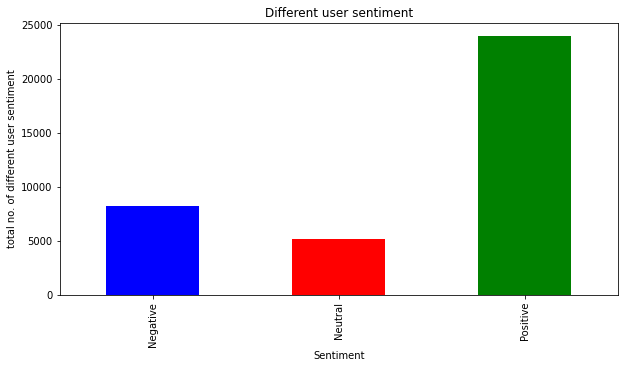

In [ ]:
# Provide the bar graph of all the application having different user sentiment
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(playapp_df)))

count_sentiment.plot(kind='bar',stacked=True, color=my_colors)
plt.title('Different user sentiment')
plt.ylabel('total no. of different user sentiment')
plt.xlabel('Sentiment')

In [ ]:
# merged two csv file
merged_playapp_df = pd.merge(playapp_df, user_review_data, how='left',left_on=['App'],right_on='App')
merged_playapp_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80699,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,0.0,NaN,NaN,NaN,NaN
80700,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.0,NaN,NaN,NaN,NaN
80701,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.0,NaN,NaN,NaN,NaN
80702,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.0,NaN,NaN,NaN,NaN


# Q21: Top 5 application having positive: Sentiment Polarity > 0.5, Sentiment subjectivity >0.5.


In [ ]:
# remove null value from the Sentiment_polarity column
merged_playapp_df.dropna(axis=0, how='all', subset=['Sentiment_Polarity'], inplace=True)
merged_playapp_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,It bad >:(,Negative,-0.725000,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80614,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
80615,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
80616,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
80617,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


In [ ]:
# find top 5 application having Sentiment_polarity>0.5 and Sentiment_Subjectivity>0.5
df_1=merged_playapp_df[ (merged_playapp_df['Sentiment_Polarity'] > 0.5) & (merged_playapp_df['Sentiment_Subjectivity'] > 0.5)].reset_index(drop=True)
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,Good great,Positive,0.750000,0.675000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,This beautiful,Positive,0.850000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,Perfect,Positive,1.000000,1.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,Good great,Positive,0.750000,0.675000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,This beautiful,Positive,0.850000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
8287,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Great app! Love addition search page. Can cons...,Positive,0.550000,0.518750
8288,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Best browser... If privacy concern please brow...,Positive,0.535119,0.714286
8289,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,0.0,Firefox Focus mobile browsers be. It 'feels' f...,Positive,0.600000,0.900000


In [ ]:
df_1=merged_playapp_df[ (merged_playapp_df['Sentiment_Polarity'] > 0.5) & (merged_playapp_df['Sentiment_Subjectivity'] > 0.5)].reset_index(drop=True).max()
df_1

App                            Housing-Real Estate & Property
Category                                              WEATHER
Rating                                                    4.9
Reviews                                                  9971
Size                                       Varies with device
Installs                                         1000000000.0
Type                                                     Paid
Price                                                   29.99
Content Rating                                           Teen
Genres                                                Weather
Last Updated                                September 8, 2017
Current Ver                           v7.0.7.1.0625.1_06_0629
Android Ver                                Varies with device
Revenue                                             2490000.0
Translated_Review         works well. Love split screen idea!
Sentiment                                            Positive
Sentimen

# Q22: Sum of Sentiment polarity rate categorywise and plot the pie chart 


In [ ]:
# find the total sum of Sentiment polarity rate categorywise
df_2=pd.DataFrame(merged_playapp_df.groupby(['Category'])
['Sentiment_Polarity'].count())
df_2

,Sentiment_Polarity
Category,
ART_AND_DESIGN,382
AUTO_AND_VEHICLES,289
BEAUTY,338
BOOKS_AND_REFERENCE,815
BUSINESS,2347
COMICS,80
COMMUNICATION,1949
DATING,3198
EDUCATION,1694


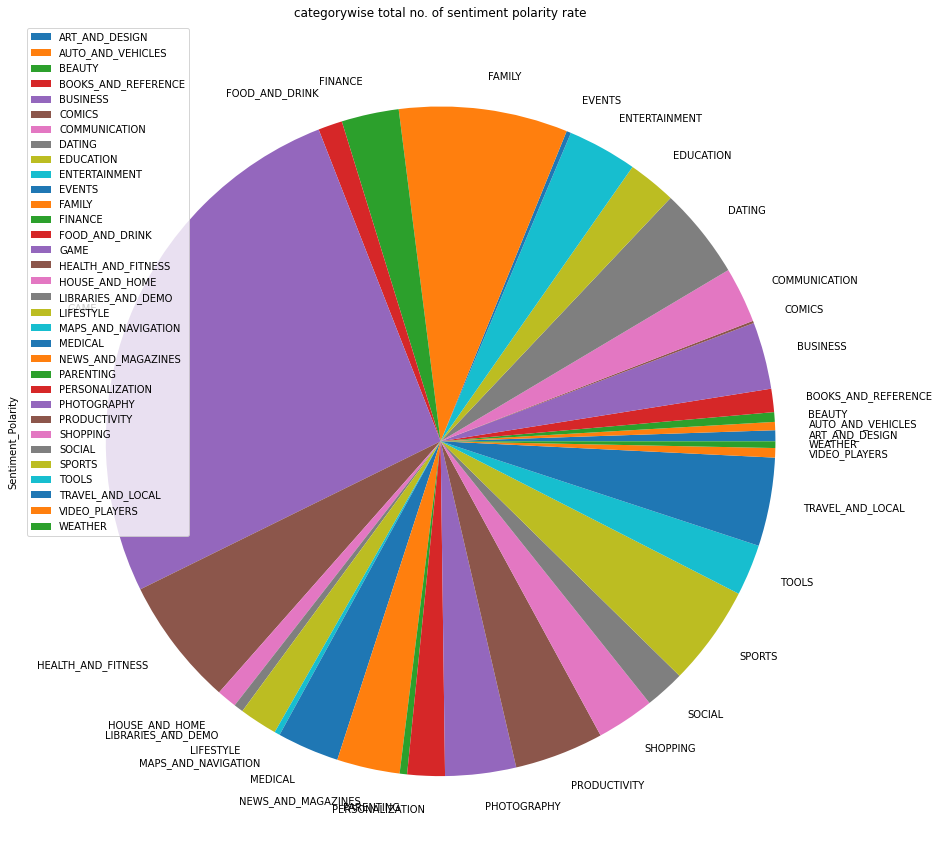

In [ ]:
# Plot the pie chart 
pie_chart=df_2['Sentiment_Polarity'].tolist()
df_2.plot.pie(y='Sentiment_Polarity',title='categorywise total no. of sentiment polarity rate',figsize=(15,20))

# Q23: Top 5 Apps with highest installs and their genre?


In [ ]:
#sorting the column installs in descending order to get maximum installs
max_installs = playapp_df.sort_values('Installs', ascending=False)

max_installs.head()

a=list(max_installs['App'].head())
b=list(max_installs['Genres'].head())

print(f'The list of the top 5 apps which have maximum installs is:', list(max_installs['App'].head()))

print(f'The list of their respective genres is:', list(max_installs['Genres'].head()))

print(f'The dictionary of the top 5 apps which have maximum installs and respective genres is: {dict(zip(a,b))}')

The list of the top 5 apps which have maximum installs is: ['Google News', 'Google Chrome: Fast & Secure', 'Gmail', 'Maps - Navigate & Explore', 'Google News']
The list of their respective genres is: ['News & Magazines', 'Communication', 'Communication', 'Travel & Local', 'News & Magazines']
The dictionary of the top 5 apps which have maximum installs and respective genres is: {'Google News': 'News & Magazines', 'Google Chrome: Fast & Secure': 'Communication', 'Gmail': 'Communication', 'Maps - Navigate & Explore': 'Travel & Local'}


# Q24: Category which has max apps with rating 4+ ?

In [ ]:
#sorting the rating columns which have 4+ rating
Max_ratings = playapp_df[playapp_df['Rating']>4]

Category_col = pd.DataFrame(Max_ratings['Category'].value_counts())
Category_col

print(f'The category which has max no. of Apps with rating 4+:{Category_col.index[0]}')


The category which has max no. of Apps with rating 4+:FAMILY


# Q25: Top 5 Most expensive application & their genre and installs?

In [ ]:
#sorting price column
max_priced_apps= playapp_df.sort_values('Price', ascending=False)
max_priced_apps.head()

max_priced_apps[['App','Category','Genres','Price']].head()

,App,Category,Genres,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,Lifestyle,400.00
5362,I Am Rich Pro,FAMILY,Entertainment,399.99
5356,I Am Rich Premium,FINANCE,Finance,399.99
5373,I AM RICH PRO PLUS,FINANCE,Finance,399.99
5351,I am rich,LIFESTYLE,Lifestyle,399.99


# Q26: How many applications were famous among teens and their list?

In [ ]:
teen_apps = playapp_df[playapp_df['Content Rating']=='Teen']

List_of_Teen_Apps = []

for elem in teen_apps['App']:
  elem = elem
  List_of_Teen_Apps.append(elem)

print(List_of_Teen_Apps)

print(len(List_of_Teen_Apps))


['Sketch - Draw & Paint', 'Tattoo Name On My Photo Editor', 'I Creative Idea', 'Android Auto - Maps, Media, Messaging & Voice', 'Selfie Camera Photo Editor & Filter & Sticker', 'Wattpad 📖 Free Books', 'Amazon Kindle', 'NOOK: Read eBooks & Magazines', 'Book store', 'Free Books - Spirit Fanfiction and Stories', 'Google Play Books', 'Spanish English Translator', 'Litnet - E-books', 'LINE WEBTOON - Free Comics', 'GANMA! - All original stories free of charge for all original comics', 'Manga Rock - Best Manga Reader', 'Manga - read Thai translation', 'Comic Es - Shojo manga / love comics free of charge ♪ ♪', 'comico Popular Original Cartoon Updated Everyday Comico', 'DC Comics', 'Manga Zero - Japanese cartoon and comic reader', 'Marvel Unlimited', 'Tapas – Comics, Novels, and Stories', 'Manga Mania - Best online manga reader', 'Manga AZ - Manga Comic Reader', 'Best Wallpapers Backgrounds(100,000+ 4K HD)', 'Messenger for SMS', 'Who', 'UC Browser Mini -Tiny Fast Private & Secure', 'Omlet Chat'

# Q27: Top 5 applications with the highest Revenue from downloads?

In [ ]:
# Creating revenue column
new_playstore_data = playapp_df.copy()
new_playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.0


In [ ]:
new_playstore_data['Revenue'] = new_playstore_data['Price']*new_playstore_data['Installs']

new_playstore_data = new_playstore_data.sort_values('Revenue', ascending=False)

new_playstore_data.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0


# Q28: Correlation b/w installs and ratings. 


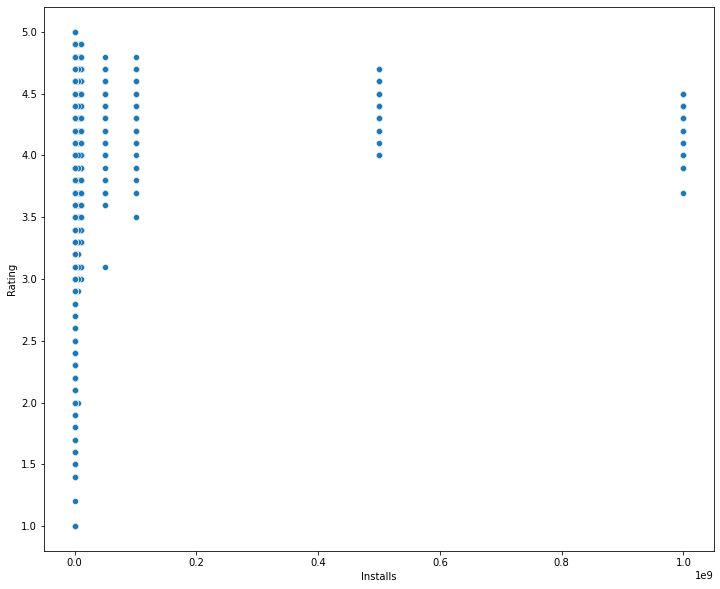

In [ ]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = playapp_df.Installs , y = playapp_df.Rating, edgecolor = 'white')

#This shows that most of the apps has rating between 3.5-5

# Q29 Relation between Total number of installations per category.

Text(0, 0.5, 'Number of Installations')

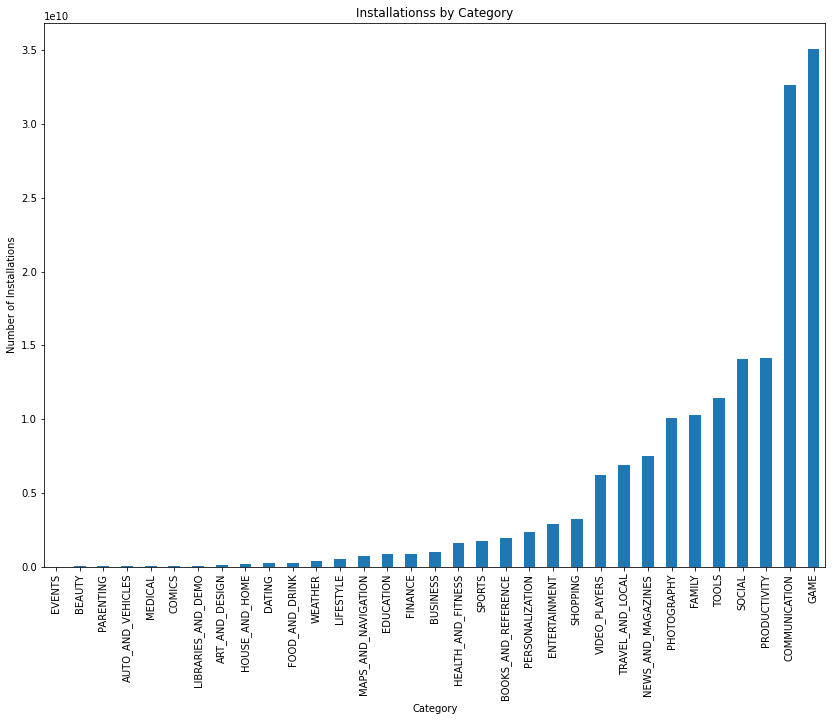

In [ ]:
playapp_df.groupby('Category').sum().sort_values(by ='Installs', ascending = 'False')

playapp_df.groupby('Category').sum().sort_values(by ='Installs', ascending = 'False')['Installs'].plot(kind = 'bar', title = 'Installationss by Category', fontsize = 10, figsize = (14,10))

plt.ylabel('Number of Installations')

#This shows that Game category has maximum no of installations

# **Conclusion:-**

1. Best gaming app based on rating is Monster Ride Pro
2. Best Art and Design app based on rating is Spring flowers theme couleurs d t space
3. Apps which have maximum installs are mostly free.
4. Total No. of Free apps are 8719 & Paid apps are 647
5. App with least rating is DS Creator 2.0 is of Category ‘Tools’
6. Apps of Category ‘Weather’ has maximum reviews
7. Best Food and drink app based on rating is Bar B-Q Rib House
8. App which generated the highest revenue is Minecraft
9. Average no. of words used in Translated reviews is 18
10. Most of user sentiments are Positive
11. Game Category has the highest sentiment polarity rate.
12. Maximum installed apps are Subway surfers,Facebook,Messenger & Google Drive
13. Category with has max no. of apps with 4+ rating is ‘Family’
14. Most expensive app on Play store is “I’m Rich” priced at 400$
15. 1208 apps are famous among teens out of 10841 apps
16. Highest revenue generated app belongs to Category ‘Family’
17. Most of the apps has got the rating between 3.5 to 5
18. Maximum no. of installations belongs to Category ‘Communication’ and ‘Social Media’
19. Most of the apps available on play store belongs to Category ‘Family’ i.e, 20.3%
20. Application reviews and installs are highly correlated i.e, 0.64
21. 48 apps are Google listed and their average rating is 4.3
22. Genre ‘Action’ has highest - 358 Gaming applications 
23. Maximum no. of applications got updated in year 2018
24. Out of all Categories, ‘Game’ has got the most positive sentiments